# 1. Problem Statement:
- Based on the data we have, we need to predict if the passenger on board survived or not.

# 2.  Reading the Data

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

In [12]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Persson, Mr. Ernst Ulrik",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 3. EDA - Exploratory Data Analysis
- Looking at the data to see what we can find without applying any complex algorithms.

## 3.1. High Level Statistics

We have 10 Attributes/features in the data, out of which 1 is the target variable which we want to predict:

1.Survived: This is our Target variable, takes 0 and 1.
* 0 = Didn't Survive
* 1 = Survived

2.Pclass: Passenger class. Basically which class did the passenger travel in.
- 1 = Upper Class, 2 = Middle Class, 3 = Lower Class
- Status of the passenger can be jugded from this.

3.Sex:	Male or Female.

4.Age:	Age in years	

5.SibSp: Number of siblings / spouses aboard the Titanic	
- If you know someone on the ship, you will look out for them, hence, they might have a slightly better chance of survival.

6.Parch: Number of parents / children aboard the Titanic	

7.Ticket: Ticket number of the passenger. Can't think of it's usage in prediction.

8.Fare: How much fare did the passenger give. Higher fare would mean higher class.

9.Cabin:	Cabin number

10.Embarked: Which port did the passenger get on board.
- C = Cherbourg, Q = Queenstown, S = Southampton

11.PassengerId: Identification number alloted to each passenger. Not of much use I guess.

## 3.2. Number of Data Points
## 3.3. How many features
## 3.4. Classes and Data points per class

In [13]:
#3.2. Number of Data Points
df.shape

(891, 12)

In [14]:
#3.3. Features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#3.4. How many classes
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Univariate Analysis
- Plotting PDF for Features like Age, Fare and checking if any of these features are able to predict something useful on their own.
- Barplots and countplots for various features.

0    549
1    342
Name: Survived, dtype: int64


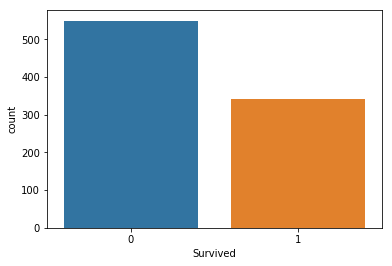

In [16]:
print(df['Survived'].value_counts())
sns.countplot(df.Survived)
plt.show()

### Age v/s Survived

/Users/rohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


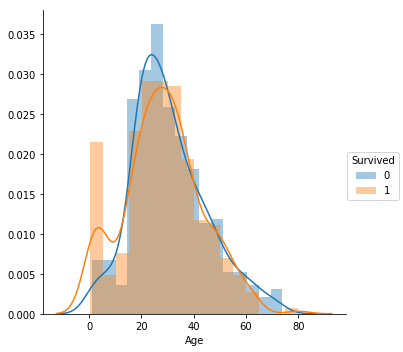

In [17]:
#Age
sns.FacetGrid(df, hue="Survived", size=5)\
   .map(sns.distplot, "Age")\
   .add_legend()

plt.subplot(1, 2, 1)
plt.hist(df.Age, edgecolor="black")
plt.title('Value counts')
plt.xlabel('Age')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.boxplot(x="Survived", y="Age", data=df)
plt.title('Survival based on Age')
plt.tight_layout()
plt.show()

- Nothing much, except like the priority was saving children it seems.

### Fare v/s Survived

/Users/rohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/rohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


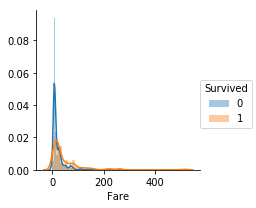

In [20]:
#Fare
sns.FacetGrid(df, hue="Survived")\
   .map(sns.distplot, "Fare")\
   .add_legend()

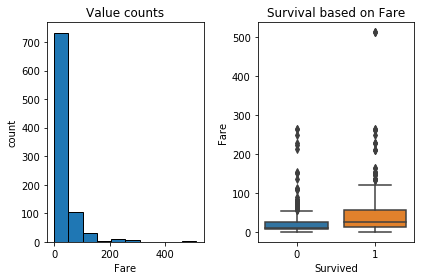

In [21]:
plt.subplot(1, 2, 1)
plt.hist(df.Fare, edgecolor="black")
plt.title('Value counts')
plt.xlabel('Fare')
plt.ylabel('count')

plt.subplot(1, 2, 2)
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title('Survival based on Fare')
plt.tight_layout()
plt.show()

It looks like passengers with lower fare had a lot of casualities.

### Sex v/s Survived

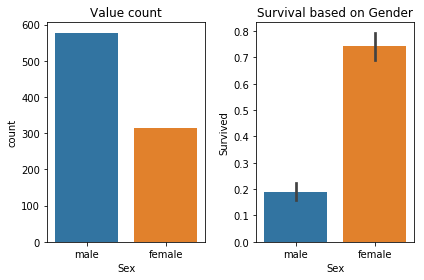

In [22]:
plt.subplot(1, 2, 1)
sns.countplot(df.Sex)
plt.title('Value count')

plt.subplot(1, 2, 2)
sns.barplot(x=df.Sex, y=df.Survived, data=df)
plt.title('Survival based on Gender')
plt.tight_layout()
plt.show()

In [23]:
women = df.loc[df.Sex == "female"]['Survived']

rate_women = 100 * sum(women)/len(women)
print('Percentage of women who survived:', rate_women)

Percentage of women who survived: 74.20382165605096


In [24]:
men = df.loc[df.Sex == "male"]['Survived']

rate_men = 100 * sum(men)/len(men)
print('Percentage of men who survived:', rate_men)

Percentage of men who survived: 18.890814558058924


- More than 70% females Survived, because most probably the safety of females and children were given the first priority.

### SibSp v/s Survived

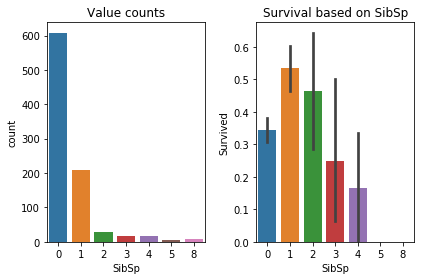

In [25]:
plt.subplot(1, 2, 1)
sns.countplot(df.SibSp)
plt.title('Value counts')

plt.subplot(1, 2, 2)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title('Survival based on SibSp')
plt.tight_layout()
plt.show()

### Parch v/s Survived

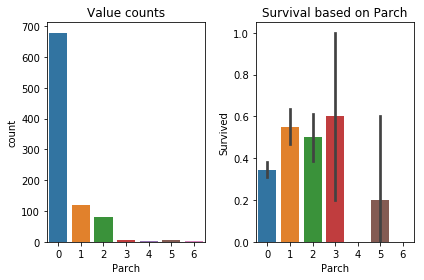

In [26]:
plt.subplot(1, 2, 1)
sns.countplot(df.Parch)
plt.title('Value counts')

plt.subplot(1, 2, 2)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title('Survival based on Parch')
plt.tight_layout()
plt.show()

### Embarked v/s Survived

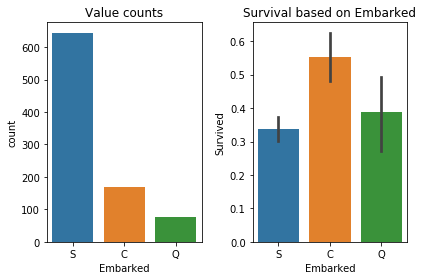

In [27]:
plt.subplot(1, 2, 1)
sns.countplot(df.Embarked)
plt.title('Value counts')

plt.subplot(1, 2, 2)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Survival based on Embarked')
plt.tight_layout()
plt.show()

### Cabin v/s Survived

In [28]:
df['Cabin'].isnull().any()

True

In [29]:
df['Cabin'] = df['Cabin'].notnull().astype(int)

df.Cabin.value_counts()

0    687
1    204
Name: Cabin, dtype: int64

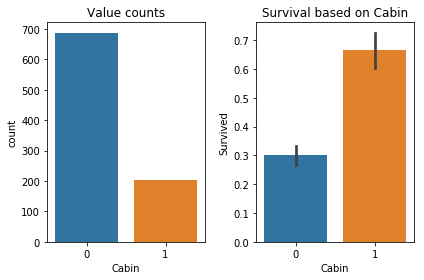

In [30]:
plt.subplot(1, 2, 1)
sns.countplot(df.Cabin)
plt.title('Value counts')

plt.subplot(1, 2, 2)
sns.barplot(x="Cabin", y="Survived", data=df)
plt.title('Survival based on Cabin')
plt.tight_layout()
plt.show()

### Pclass v/s Survived

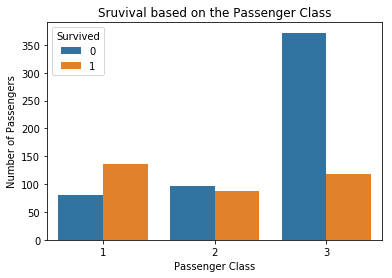

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Sruvival based on the Passenger Class')
plt.ylabel('Number of Passengers')
plt.xlabel('Passenger Class')
plt.show()

In [32]:
#Pclass = 1
Pclass1 = df.loc[df.Pclass == 1]['Survived']
rate_pclass1 = 100 * sum(Pclass1)/len(Pclass1)
print('% of Passengers who survived in Passenger Class 1: ', rate_pclass1)

#Pclass = 2
Pclass2 = df.loc[df.Pclass == 2]['Survived']
rate_pclass2 = 100 * sum(Pclass2)/len(Pclass2)
print('% of Passengers who survived in Passenger Class 2: ', rate_pclass2)

#Pclass = 3
Pclass3 = df.loc[df.Pclass == 3]['Survived']
rate_pclass3 = 100 * sum(Pclass3)/len(Pclass3)
print('% of Passengers who survived in Passenger Class 3: ', rate_pclass3)

% of Passengers who survived in Passenger Class 1:  62.96296296296296
% of Passengers who survived in Passenger Class 2:  47.28260869565217
% of Passengers who survived in Passenger Class 3:  24.236252545824847


Here it shows, that maximum passengers who did not survive were from the 3rd Passenger Class.

# 5. Working with missing values


Working with missing values.
- Checking which column has how many missing values
- And then somehow filling the missing values

In [33]:
df.isnull().values.any()

True

In [34]:
print(df.isnull().sum())
print("Total missing values in Train Data: ", df.isnull().sum().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64
Total missing values in Train Data:  179


Now, filling the missing values in Age column with the median age of the particular Title. 
- Mr, Mrs, Miss, Master
- For that, we need to create a new column called Title, which we will fill using the values in the Name Column, and extract the titles.

In [37]:
data = [df]

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract( '([A-Za-z]+)\.')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,Mr


In [38]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Ms            1
Countess      1
Mme           1
Capt          1
Sir           1
Don           1
Lady          1
Jonkheer      1
Name: Title, dtype: int64

In [39]:
data = [df]
titles = ['Mr', 'Mrs', 'Miss', 'Master', 'Different']

for dataset in data:
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Dona'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Dr', 'Rev', 'Jonkheer', 'Mme'], 'Different')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Sir', 'Capt', 'Col', 'Major'], 'Mr')

df['Title'].value_counts()

Mr           524
Miss         185
Mrs          126
Master        40
Different     16
Name: Title, dtype: int64

In [40]:
#For train data
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))
print(df['Age'].isnull().sum())

0


### Missing Values in Embarked feature
- Embarked column also has 2 missing values.

In [41]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
df['Embarked'].fillna('S', inplace=True)
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [43]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64


### Fare also has a missing value in test data. 
- So, we will look at the correlation and fill with the median accordingly.

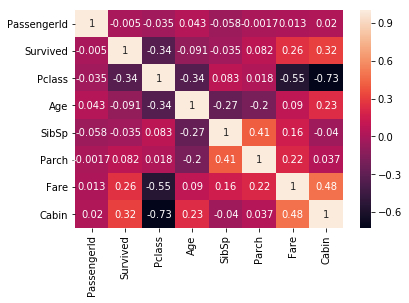

In [44]:
sns.heatmap(df.corr(), annot=True)

**Observation:** Fare is correlated with the Passenger class, so using Pclass and filling the median in the missing values.

In [45]:
#Train
df['Fare'] = df['Fare'].fillna(df.groupby('Pclass')['Fare'].transform('median'))
print(df['Fare'].isnull().sum())

0


# Feature Engineering

1. Replacing the Male and Female values in the Sex column to 0 and 1.

In [46]:
gender = {"male":0, "female":1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C,Mrs


2. Replacing the Embarked Column values from S,C,Q to 0, 1, 2.


In [47]:
ports = {"S":0, "C":1, "Q":2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,Mrs


3. Replacing Titles with numbers

In [48]:
titles = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Different":4}
data = [df]

for dataset in data:
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].astype('int')

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,2


4. Creating Categories for Age

In [49]:
pd.qcut(df['Age'], 8)

0      (21.846, 25.0]
1        (36.0, 45.0]
2        (25.0, 30.0]
3      (32.727, 36.0]
4      (32.727, 36.0]
5      (30.0, 32.727]
6        (45.0, 80.0]
7       (0.419, 17.0]
8        (25.0, 30.0]
9       (0.419, 17.0]
10      (0.419, 17.0]
11       (45.0, 80.0]
12     (17.0, 21.846]
13       (36.0, 45.0]
14      (0.419, 17.0]
15       (45.0, 80.0]
16      (0.419, 17.0]
17     (30.0, 32.727]
18     (30.0, 32.727]
19       (36.0, 45.0]
20     (32.727, 36.0]
21     (32.727, 36.0]
22      (0.419, 17.0]
23       (25.0, 30.0]
24      (0.419, 17.0]
25       (36.0, 45.0]
26     (30.0, 32.727]
27     (17.0, 21.846]
28     (17.0, 21.846]
29     (30.0, 32.727]
            ...      
861    (17.0, 21.846]
862      (45.0, 80.0]
863    (17.0, 21.846]
864    (21.846, 25.0]
865      (36.0, 45.0]
866      (25.0, 30.0]
867    (30.0, 32.727]
868    (30.0, 32.727]
869     (0.419, 17.0]
870      (25.0, 30.0]
871      (45.0, 80.0]
872    (32.727, 36.0]
873      (45.0, 80.0]
874      (25.0, 30.0]
875     (0

In [50]:
data = [df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype('int')
    dataset.loc[dataset['Age'] <=17, 'Age'] = 0
    dataset.loc[(dataset['Age'] >17) & (dataset['Age'] <=21), 'Age'] = 1
    dataset.loc[(dataset['Age'] >21) & (dataset['Age'] <=25), 'Age'] = 2
    dataset.loc[(dataset['Age'] >25) & (dataset['Age'] <=30), 'Age'] = 3
    dataset.loc[(dataset['Age'] >30) & (dataset['Age'] <=32), 'Age'] = 4
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <=36), 'Age'] = 5
    dataset.loc[(dataset['Age'] >36) & (dataset['Age'] <=45), 'Age'] = 6
    dataset.loc[dataset['Age'] >45, 'Age'] = 7

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,71.2833,1,1,2


In [51]:
df["Age"].value_counts()

4    156
1    127
0    117
3    110
7    101
2     97
6     94
5     89
Name: Age, dtype: int64

5. Creating Categories for Fare

In [52]:
data = [df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    
pd.qcut(df['Fare'], 5)

0      (-0.001, 7.0]
1      (39.0, 512.0]
2      (-0.001, 7.0]
3      (39.0, 512.0]
4        (7.0, 10.0]
5        (7.0, 10.0]
6      (39.0, 512.0]
7       (10.0, 21.0]
8       (10.0, 21.0]
9       (21.0, 39.0]
10      (10.0, 21.0]
11      (21.0, 39.0]
12       (7.0, 10.0]
13      (21.0, 39.0]
14     (-0.001, 7.0]
15      (10.0, 21.0]
16      (21.0, 39.0]
17      (10.0, 21.0]
18      (10.0, 21.0]
19     (-0.001, 7.0]
20      (21.0, 39.0]
21      (10.0, 21.0]
22       (7.0, 10.0]
23      (21.0, 39.0]
24      (10.0, 21.0]
25      (21.0, 39.0]
26     (-0.001, 7.0]
27     (39.0, 512.0]
28     (-0.001, 7.0]
29     (-0.001, 7.0]
           ...      
861     (10.0, 21.0]
862     (21.0, 39.0]
863    (39.0, 512.0]
864     (10.0, 21.0]
865     (10.0, 21.0]
866     (10.0, 21.0]
867    (39.0, 512.0]
868      (7.0, 10.0]
869     (10.0, 21.0]
870    (-0.001, 7.0]
871    (39.0, 512.0]
872    (-0.001, 7.0]
873      (7.0, 10.0]
874     (21.0, 39.0]
875    (-0.001, 7.0]
876      (7.0, 10.0]
877    (-0.00

In [53]:
data = [df]

for dataset in data:
    dataset.loc[dataset['Fare'] <=7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] >7) & (dataset['Fare'] <=10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] >10) & (dataset['Fare'] <=21), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] >21) & (dataset['Fare'] <=39), 'Fare'] = 3
    dataset.loc[dataset['Fare'] >39 , 'Fare'] = 4

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,4,1,1,2


## Creating some new features:-
- FamilySize
- FarePerPerson
- AgeClass

In [54]:
data = [df]

for dataset in data:
    #FamilySize
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['FamilySize'] = dataset['FamilySize'].astype('int')
    
    #FarePerPerson
    dataset['FarePerMember'] = dataset['Fare']/(dataset['FamilySize'])
    dataset['FarePerMember'] = dataset['FarePerMember'].astype('int')
    
    #AgeClass
    dataset['AgeClass'] = dataset['Age'] * dataset['Pclass']

df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,FarePerMember,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,0,0,0,2,0,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,6,1,0,PC 17599,4,1,1,2,2,2,6


# Modelling

In [55]:
Y = df['Survived']
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked", "Title", "Cabin", "FamilySize", "FarePerMember", "AgeClass"]
X = pd.get_dummies(df[features])

X.head()

,Pclass,Sex,SibSp,Parch,Age,Fare,Embarked,Title,Cabin,FamilySize,FarePerMember,AgeClass
0,3,0,1,0,2,0,0,0,0,2,0,6
1,1,1,1,0,6,4,1,2,1,2,2,6
2,3,1,0,0,3,0,0,1,0,1,0,9
3,1,1,1,0,5,4,0,2,1,2,2,5
4,3,0,0,0,5,1,0,0,0,1,1,15


#### Splitting the Training data into 2 parts: Train and Test
- This is to find which algorithm performs the best on unknown data, since that is what that matters.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(712, 12)
(712,)
(179, 12)
(179,)


#### Now applying various ML Algorithms and checking which one gives better results.

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def apply_models(x_train, x_test, y_train, y_test):
    
    #Logistic Regression(log_reg)
    log_reg_model = LogisticRegression(class_weight='balanced', random_state=42)
    log_reg_model.fit(x_train, y_train)
    log_reg_y_pred = log_reg_model.predict(x_test)
    log_reg_acc = accuracy_score(y_test, log_reg_y_pred)
    log_reg_tr = log_reg_model.score(X_train, Y_train)
    
    #Gaussian Naive Bayes(nb)
    nb_model = GaussianNB()
    nb_model.fit(x_train, y_train)
    nb_y_pred = nb_model.predict(x_test)
    nb_acc = accuracy_score(y_test, nb_y_pred)
    nb_tr = nb_model.score(X_train, Y_train)
    
    #KNearest Neighbors(knn)
    knn_model = KNeighborsClassifier()
    knn_model.fit(x_train, y_train)
    knn_y_pred = knn_model.predict(x_test)
    knn_acc = accuracy_score(y_test, knn_y_pred)
    knn_tr = knn_model.score(X_train, Y_train)
    
    #Linear SVC - Support Vector Machine for Classification
    svc_model = LinearSVC(class_weight='balanced', random_state=42)
    svc_model.fit(x_train, y_train)
    svc_y_pred = svc_model.predict(x_test)
    svc_acc = accuracy_score(y_test, svc_y_pred)
    svc_tr = svc_model.score(X_train, Y_train)
    
    #Decision Tree(dt)
    dt_model = DecisionTreeClassifier()
    dt_model.fit(x_train, y_train)
    dt_y_pred = dt_model.predict(x_test)
    dt_acc = accuracy_score(y_test, dt_y_pred)
    dt_tr = dt_model.score(X_train, Y_train)
    
    #Random Forest(rf)
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(x_train, y_train)
    rf_y_pred = rf_model.predict(x_test)
    rf_acc = accuracy_score(y_test, rf_y_pred)
    rf_tr = rf_model.score(X_train, Y_train)
    
    
    scores = pd.DataFrame({
        'Models': ['Logistic Regression', 'Gaussian Naive Bayes', 'KNN', 'Linear SVC', 'Decision Tree', 'Random Forest'],
        'TrainScores': [log_reg_tr, nb_tr, knn_tr, svc_tr, dt_tr, rf_tr],
        'TestScores': [log_reg_acc, nb_acc, knn_acc, svc_acc, dt_acc, rf_acc]
    })
    
    scores.sort_values(by='TestScores', ascending=False, inplace=True)
    scores = scores.set_index('Models')
    return scores

In [58]:
scores = apply_models(X_train, X_test, Y_train, Y_test)
scores

,TrainScores,TestScores
Models,,
KNN,0.837079,0.843575
Random Forest,0.918539,0.832402
Decision Tree,0.918539,0.821229
Logistic Regression,0.813202,0.815642
Linear SVC,0.817416,0.804469
Gaussian Naive Bayes,0.785112,0.787709


#### Hyperparamter Tuning the Random Forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score


N_Estimators = [50, 100, 150, 200, 250, 300]
Depth = [5, 10, 20, 30, 40, 50, 60, 70]

parameters = {'n_estimators': N_Estimators, 'max_depth': Depth}

rf = RandomForestClassifier()
rf_model = RandomizedSearchCV(rf, parameters, scoring='roc_auc', n_iter=40, cv=5, return_train_score=True)

rf_model.fit(X_train, Y_train)

print(rf_model.best_score_)
print(rf_model.best_params_)


0.8686793215104408
{'n_estimators': 300, 'max_depth': 5}


In [60]:
best_estimator = rf_model.best_params_['n_estimators']
best_depth = rf_model.best_params_['max_depth']

In [62]:
predictions = rf_model.predict(X_test)

In [65]:
predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [64]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_titanic_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_model, file)

In [61]:
#Y = train_data["Survived"]

#features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked", "Title", "Cabin", "FamilySize", "FarePerMember", "AgeClass"]

#X_test_data = pd.get_dummies(test_data[features])

#model = RandomForestClassifier(n_estimators=best_estimator, max_depth=best_depth, random_state=42)
#model.fit(X, Y)
#predictions = model.predict(X_test_data)

#output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)
#print("Your submission was successfully saved!")